In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import plotly.express as px
from datetime import datetime as dt
from datetime import timedelta as td
import os
%matplotlib inline

In [2]:
#read csv file for Impact of Covid19 on global economy
df_raw = pd.read_csv('Dataset/raw_data.csv')
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [3]:
#Remove unnamed column since we don't know what that data stands for
df_raw.drop('Unnamed: 9', inplace=True, axis=1)
df_raw.drop('Unnamed: 10', inplace=True, axis=1)
df_raw.drop('Unnamed: 11', inplace=True, axis=1)
df_raw.drop('Unnamed: 12', inplace=True, axis=1)
df_raw.drop('Unnamed: 13', inplace=True, axis=1)

df_raw.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498


In [4]:
df_raw.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


In [5]:
#Detect all missing values
print('\n', df_raw.isna().sum())


 iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64


In [6]:
#replace all missing values with 0
df = df_raw.replace(to_replace = np.nan, value = 0)

In [7]:
df.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [8]:
print('\n', df.isna().sum())


 iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64


In [9]:
#read Unemployment rate data and clean it
df_unemployment = pd.read_csv('Dataset/unemployment_data.csv')
df_unemployment.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,M,2005-01,5.074622,NaN
1,AUS,HUR,TOT,PC_LF,M,2005-02,5.085431,NaN
2,AUS,HUR,TOT,PC_LF,M,2005-03,5.163756,NaN
3,AUS,HUR,TOT,PC_LF,M,2005-04,5.123358,NaN
4,AUS,HUR,TOT,PC_LF,M,2005-05,5.100113,NaN


In [10]:
df_unemployment.describe()

,Value
count,7943.000000
mean,7.767095
std,3.946975
min,1.700000
25%,5.100000
50%,7.000000
75%,9.300000
max,28.000000


In [11]:
#Detect all missing values
print('\n', df_unemployment.isna().sum())


 LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    7104
dtype: int64


In [12]:
#Remove the flag code column since only few countries have it on.
df_unemployment.drop('Flag Codes', inplace=True, axis=1)
print('\n', df_unemployment.isna().sum())
df_unemployment.head()


 LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,HUR,TOT,PC_LF,M,2005-01,5.074622
1,AUS,HUR,TOT,PC_LF,M,2005-02,5.085431
2,AUS,HUR,TOT,PC_LF,M,2005-03,5.163756
3,AUS,HUR,TOT,PC_LF,M,2005-04,5.123358
4,AUS,HUR,TOT,PC_LF,M,2005-05,5.100113


In [13]:
df_usa = df[(df.iso_code == "USA") & (df.date >= '2020-01-01') & (df.date <= '2020-12-31')]

In [14]:
# filter out USA data
df_usa.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
48122,USA,United States,2020-01-01,0.0,0.0,0.0,331002647,54225.446,0.924
48123,USA,United States,2020-01-02,0.0,0.0,0.0,331002647,54225.446,0.924
48124,USA,United States,2020-01-03,0.0,0.0,0.0,331002647,54225.446,0.924
48125,USA,United States,2020-01-04,0.0,0.0,0.0,331002647,54225.446,0.924
48126,USA,United States,2020-01-05,0.0,0.0,0.0,331002647,54225.446,0.924


In [15]:
df_unemp_usa = df_unemployment[(df_unemployment.LOCATION == "USA") & 
                               (df_unemployment.TIME >= "2020-01") & (df_unemployment.TIME <= "2020-10")]

In [16]:
# filter out USA data
df_unemp_usa.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
5660,USA,HUR,TOT,PC_LF,M,2020-01,3.5
5661,USA,HUR,TOT,PC_LF,M,2020-02,3.5
5662,USA,HUR,TOT,PC_LF,M,2020-03,4.4
5663,USA,HUR,TOT,PC_LF,M,2020-04,14.7
5664,USA,HUR,TOT,PC_LF,M,2020-05,13.2


In [17]:
# find the monthly average for Covid-19 data
df_usa = df_usa.groupby(pd.PeriodIndex(df_usa['date'], freq="M"))['total_cases', 'total_deaths', 
                                                       'stringency_index', 'population', 'gdp_per_capita',
                                                      'human_development_index'].mean().reset_index()
# df_usa = df_usa.groupby([df_usa['date'].dt.month]).mean()

/tmp/ipykernel_15154/1629634127.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_usa = df_usa.groupby(pd.PeriodIndex(df_usa['date'], freq="M"))['total_cases', 'total_deaths',


In [18]:
display(df_usa)
display(df_unemp_usa)

,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,2020-01,1.096774e+00,0.000000,0.000000,331002647.0,54225.446,0.924
1,2020-02,2.293103e+01,0.000000,5.368276,331002647.0,54225.446,0.924
2,2020-03,2.986903e+04,492.516129,45.774516,331002647.0,54225.446,0.924
3,2020-04,6.231678e+05,30235.900000,72.690000,331002647.0,54225.446,0.924
4,2020-05,1.435469e+06,85573.903226,72.690000,331002647.0,54225.446,0.924
5,2020-06,2.134798e+06,115824.800000,70.711333,331002647.0,54225.446,0.924
6,2020-07,3.524412e+06,138126.870968,68.263871,331002647.0,54225.446,0.924
7,2020-08,5.319047e+06,168750.677419,67.130000,331002647.0,54225.446,0.924
8,2020-09,6.597556e+06,195337.300000,64.197667,331002647.0,54225.446,0.924
9,2020-10,7.672370e+06,213387.947368,39.473684,331002647.0,54225.446,0.924


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
5660,USA,HUR,TOT,PC_LF,M,2020-01,3.5
5661,USA,HUR,TOT,PC_LF,M,2020-02,3.5
5662,USA,HUR,TOT,PC_LF,M,2020-03,4.4
5663,USA,HUR,TOT,PC_LF,M,2020-04,14.7
5664,USA,HUR,TOT,PC_LF,M,2020-05,13.2
5665,USA,HUR,TOT,PC_LF,M,2020-06,11.0
5666,USA,HUR,TOT,PC_LF,M,2020-07,10.2
5667,USA,HUR,TOT,PC_LF,M,2020-08,8.4
5668,USA,HUR,TOT,PC_LF,M,2020-09,7.9
5669,USA,HUR,TOT,PC_LF,M,2020-10,6.9


In [19]:
# convert pandas date to string

date = df_usa.date.dt.strftime('%Y-%m')
display(date)

0    2020-01
1    2020-02
2    2020-03
3    2020-04
4    2020-05
5    2020-06
6    2020-07
7    2020-08
8    2020-09
9    2020-10
Name: date, dtype: object

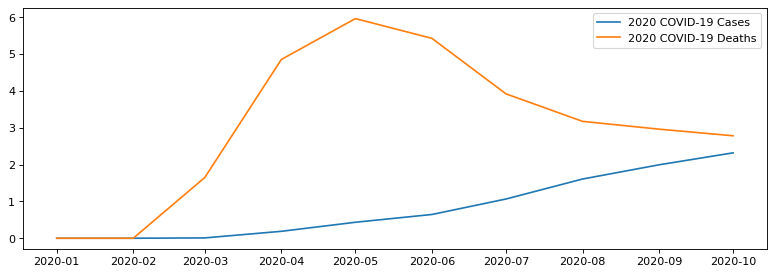

In [20]:
# plot covid information

covid_x = [dt.strptime(d,"%Y-%m").date() for d in date]
covid_y = (df_usa['total_cases']/df_usa['population'])*100

death_x = [dt.strptime(d,"%Y-%m").date() for d in date]
death_y = (df_usa['total_deaths']/df_usa['total_cases'])*100

fig(figsize=(12, 4), dpi=80)

plt.plot(covid_x, covid_y, label = "2020 COVID-19 Cases")
plt.plot(death_x, death_y, label = "2020 COVID-19 Deaths")

plt.legend()
plt.show()

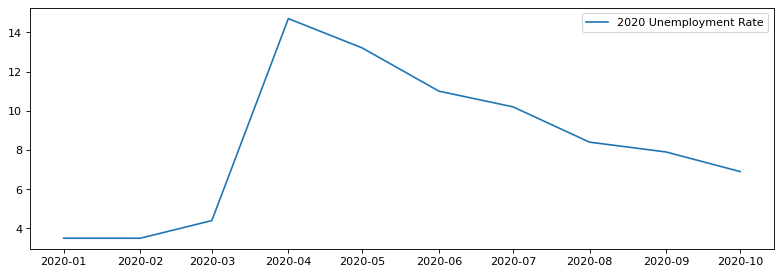

In [21]:
# plot unemployemnt information

unemp_x = [dt.strptime(d,"%Y-%m").date() for d in df_unemp_usa['TIME']]
unemp_y = df_unemp_usa['Value']

fig(figsize=(12, 4), dpi=80)

plt.plot(unemp_x, unemp_y, label = "2020 Unemployment Rate")
plt.legend()
plt.show()


In [22]:
# train covid information

from sklearn import linear_model

In [23]:
# train covid rates

# since date values are not fit to model, convert dates to ints
date_int = []
for i in range(0, len(df_usa['date'])):
    date_int.append([i])
X = date_int
y = df_usa['total_cases'].tolist()[0:]

start = 0
X = X[start:]
y = y[start:]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X, y)

print("Linear regression model Score: %s" % (linear_regression.score(X, y)))

Linear regression model Score: 0.9175637239157822


In [24]:
# train covid death

date_int = []
for i in range(0, len(df_usa['date'])):
    date_int.append([i])
X_d = date_int
y_d = df_usa['total_deaths'].tolist()[0:]

start_d = 0
X_d = X_d[start_d:]
y_d = y_d[start_d:]

linear_regression_d = linear_model.LinearRegression()
linear_regression_d.fit(X_d , y_d)

print("Linear regression model Score: %s" % (linear_regression.score(X_d , y_d)))

Linear regression model Score: -2135.413809006331


In [25]:
# predicting future covid trends
from sklearn.metrics import max_error

y_pred = linear_regression.predict(X)
error = max_error(y, y_pred)

X_test =[]
months_to_pred = 22
for i in range(start, start+months_to_pred):
    X_test.append([i])

y_pred_lr = linear_regression.predict(X_test)

y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_lr)):
    y_pred_max.append(y_pred_lr[i] + error)
    y_pred_min.append(y_pred_lr[i] - error)

In [26]:
# predicting future covid death trends
from sklearn.metrics import max_error

y_pred_d = linear_regression_d.predict(X_d)
error_d = max_error(y_d, y_pred_d)

X_test_d =[]
months_to_pred_d = 22
for i in range(start_d, start_d+months_to_pred_d):
    X_test_d.append([i])

y_pred_lr_d = linear_regression_d.predict(X_test_d)

y_pred_max_d = []
y_pred_min_d = []
for i in range(0, len(y_pred_lr_d)):
    y_pred_max_d.append(y_pred_lr_d[i] + error_d)
    y_pred_min_d.append(y_pred_lr_d[i] - error_d)

In [27]:
# formatting date int back to date

from dateutil.relativedelta import relativedelta

date_zero = dt.strptime(date[start], "%Y-%m")
date_prev = []
x_ticks = []

curr_date = date_zero
x_curr = start
for i in range(0,months_to_pred):
    date_prev.append(dt.strftime(curr_date, '%Y-%m'))
    x_ticks.append(x_curr)
    curr_date = curr_date + relativedelta(months=1)
    x_curr = x_curr + 1

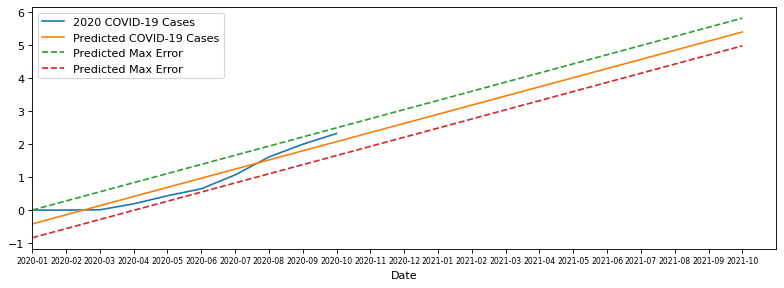

In [32]:
# plot predicted covid information

popval = df_usa['population'][0]
y_percentage = []
for i in range(0,len(y)):
    perc = ((y[i]/popval)*100)
    y_percentage.append(perc)

y_lin_percentage = []
for i in range(0,len(y_pred_lr)):
    perc = ((y_pred_lr[i]/popval)*100)
    y_lin_percentage.append(perc)
    
y_max_percentage = []
for i in range(0,len(y_pred_max)):
    perc = ((y_pred_max[i]/popval)*100)
    y_max_percentage.append(perc)

y_min_percentage = []
for i in range(0,len(y_pred_min)):
    perc = ((y_pred_min[i]/popval)*100)
    y_min_percentage.append(perc)

fig(figsize=(12, 4), dpi=80)

plt.plot(X, y_percentage, label = "2020 COVID-19 Cases")
plt.plot(X_test, y_lin_percentage,label = "Predicted COVID-19 Cases")
plt.plot(X_test, y_max_percentage, linestyle='dashed',label = "Predicted Max Error")
plt.plot(X_test, y_min_percentage, linestyle='dashed',label = "Predicted Max Error")

plt.xlabel('Date')
plt.xlim(start, start + months_to_pred)
plt.xticks(x_ticks, date_prev)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.legend()
plt.show()

[-54984.95747491898, -27814.85297525339, -644.7484755878031, 26525.356024077788, 53695.46052374337, 80865.56502340897, 108035.66952307455, 135205.77402274014, 162375.87852240572, 189545.9830220713, 216716.08752173692, 243886.19202140244, 271056.2965210681, 298226.40102073364, 325396.5055203992, 352566.61002006475, 379736.7145197304, 406906.819019396, 434076.9235190615, 461247.0280187272, 488417.13251839275, 515587.2370180583]
[-2773549.522829512, -1857894.961493454, -942240.4001573955, -26585.838821337093, 889068.7225147211, 1804723.2838507798, 2720377.845186838, 3636032.4065228957, 4551686.967858955, 5467341.5291950125, 6382996.090531072, 7298650.651867129, 8214305.213203188, 9129959.774539245, 10045614.335875304, 10961268.897211362, 11876923.45854742, 12792578.01988348, 13708232.581219537, 14623887.142555596, 15539541.703891655, 16455196.26522771]


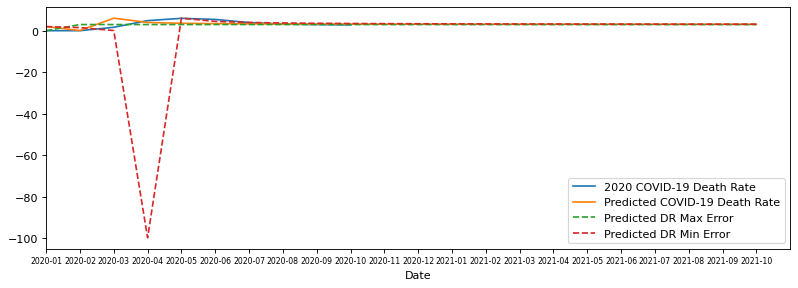

In [37]:
y_percentage_d = []
for i in range(0,len(y_d)):
    if(y_d[i] == 0 and y[i] == 0):
        y_percentage_d.append(0)
    else:
        perc = ((y_d[i]/y[i])*100)
        y_percentage_d.append(perc)

y_lin_percentage_d = []
for i in range(0,len(y_pred_lr_d)):
    perc = ((y_pred_lr_d[i]/y_pred_lr[i])*100)
    y_lin_percentage_d.append(perc)
    
y_max_percentage_d = []
for i in range(0,len(y_pred_max_d)):
    perc = ((y_pred_max_d[i]/y_pred_max[i])*100)
    y_max_percentage_d.append(perc)

y_min_percentage_d = []
print(y_pred_min_d)
print(y_pred_min)
for i in range(0,len(y_pred_min_d)):
    perc = ((y_pred_min_d[i]/y_pred_min[i])*100)
    y_min_percentage_d.append(perc)

fig(figsize=(12, 4), dpi=80)

plt.plot(X_d, y_percentage_d, label = "2020 COVID-19 Death Rate")
plt.plot(X_test_d, y_lin_percentage_d,label = "Predicted COVID-19 Death Rate")
plt.plot(X_test_d, y_max_percentage_d, linestyle='dashed',label = "Predicted DR Max Error")
plt.plot(X_test_d, y_min_percentage_d, linestyle='dashed',label = "Predicted DR Min Error")

plt.xlabel('Date')
plt.xlim(start, start + months_to_pred)
plt.xticks(x_ticks, date_prev)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.legend()
plt.show()